In [1]:
import matplotlib.pyplot as plt
import os, glob, cv2


In [2]:
 # eval 'background' mean dice values
# calculating bg dice value since in some slices, there is no gt mask, which forces dice value to zero, which does not work along with other slices which do have gt mask.
# to avoid this discrepency, we calculate dice coefficient of 'bg' mask.

from predict.eval import main
import yaml, numpy as np


eval_config_file = '/home/chadrick/prj/kaggle/hubmap/predict/config/eval_config/210314_0.yaml'

with open(eval_config_file, 'r') as fd:
    config = yaml.load(fd, Loader=yaml.FullLoader)
    
print('>> config')
print(config)    
    
result, outputdir = main(config)

# print(result)

>> config
{'ckpt': '/home/chadrick/prj/kaggle/hubmap/train/ckpt/train_v1/210314_153029_EfficientUnetb2__dice_loss__256x256/customsave/dice_0.9851168887385492_epoch=0_step=709.pt', 'gpu': 0, 'model_type': 'EfficientUnetb2', 'resize_w': 256, 'resize_h': 256, 'batch_size': 4, 'threshold': 0.6, 'target': '/home/chadrick/prj/kaggle/hubmap/data_prep/testoutput/split_trainval_from_coverage_split/210313_171723/valid'}


100%|██████████| 24/24 [00:02<00:00,  8.42it/s]

bg mean_dice: 0.985325992407994


total valid images: 96


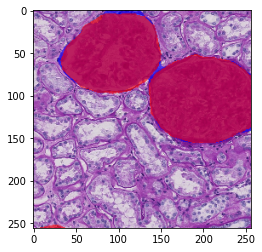

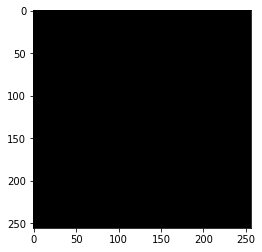

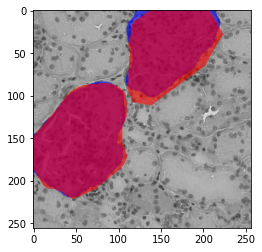

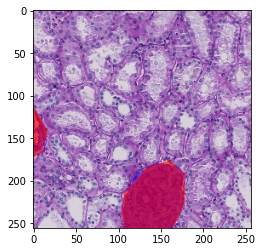

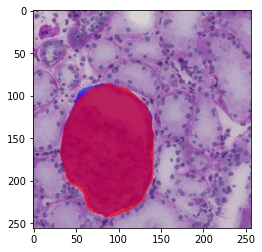

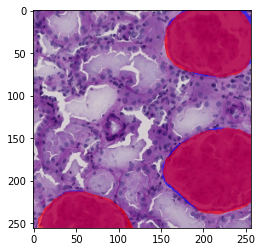

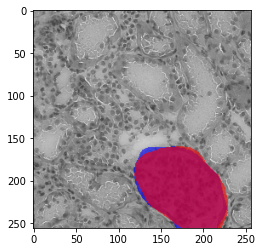

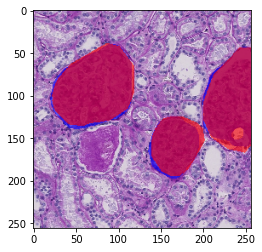

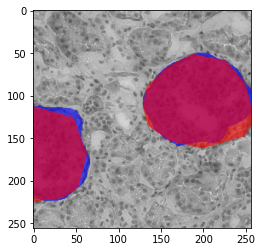

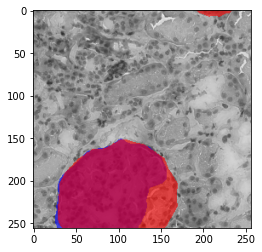

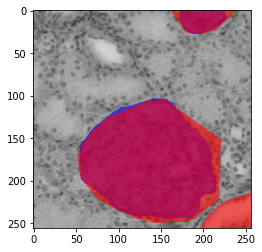

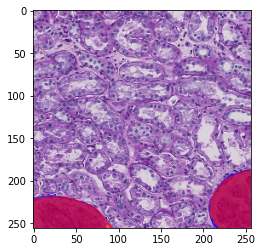

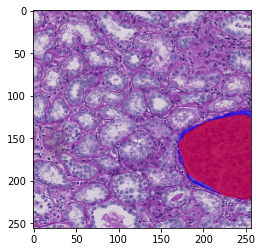

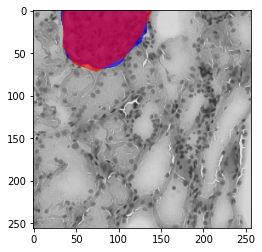

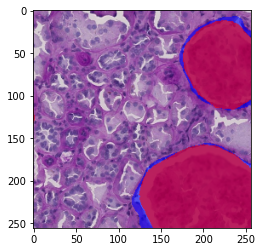

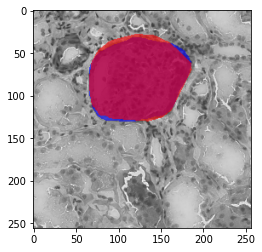

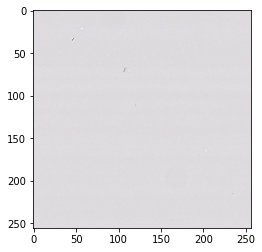

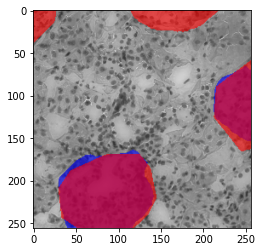

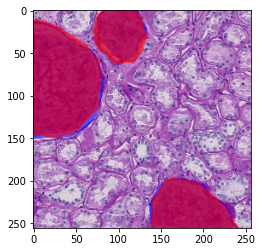

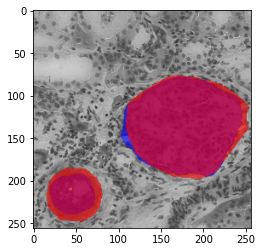

In [3]:

files = glob.glob(os.path.join(outputdir, '*.png'))

print(f'total valid images: {len(files)}')

sel_files = files[:20]

# print(sel_files)

for f in sel_files:
    img = cv2.imread(f)
    plt.figure()
    plt.imshow(img)
    
# red: pred, blue: gt area


[ 0  0  0  0  0  0  0  0  0 96]


([<matplotlib.axis.XTick at 0x7fada57a7e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

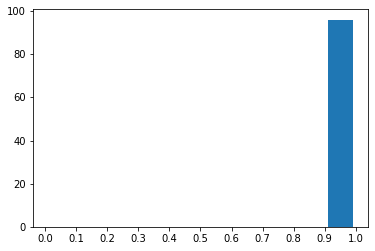

In [4]:
gap = 0.1
bins = np.arange(0, 1. + gap/2, gap)

# print(bins)

dice_result = result['results']

dice_val_list = list(dice_result.values())

# print(dice_val_list)

hist, _ = np.histogram(np.array(dice_val_list), bins=bins)

print(hist)

figure = plt.figure()

x_arr = bins[:-1] + gap/2


plt.bar(x_arr, hist, width=0.8* gap)
plt.xticks(bins)
# plt.set_xticks(x_arr)

In [5]:
# show bad dice results
# print(result)
bad_dice_results = []

for k,v in result['results'].items():
    if v <= 0.9:
        bad_dice_results.append(k)


print(bad_dice_results)

for a in bad_dice_results:
    path = os.path.join(outputdir, a)
    
    img = cv2.imread(path)
    plt.figure()
    
    plt.imshow(img)

[]
